<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/wide_and_deep_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# content
- we will implement the following wide and deep network
- also we will pass 6 features from the deep network and 5 from the wide network

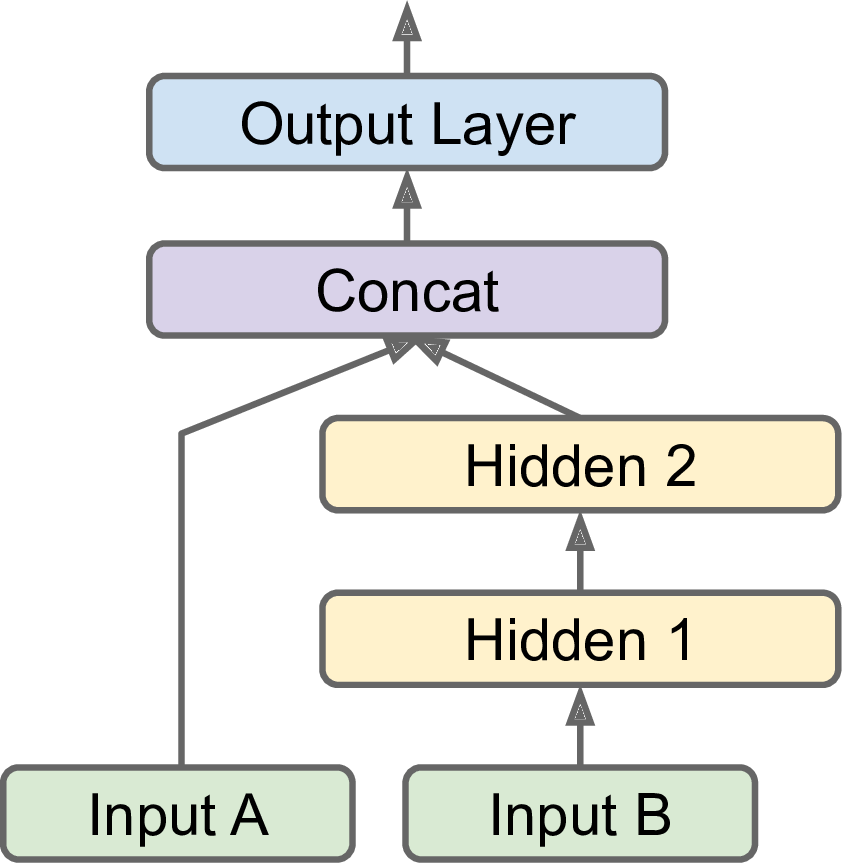

In [1]:
from IPython.display import Image
Image("/content/mls2_1015.png", width=500)

# import

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

# dataset
from sklearn.datasets import fetch_california_housing

# model
from keras import Model
# layer
from keras.layers import Input, Dense, Concatenate
# activation
from keras.activations import relu
# optimization
from keras.optimizers import adam
# loss
from keras.losses import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.2.0
2.3.0-tf


Using TensorFlow backend.


# load the data

In [0]:
dataset = fetch_california_housing()

In [0]:
X = dataset.data
y = dataset.target

In [20]:
X.shape

(20640, 8)

# split the data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# standardize

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# data preparation

In [0]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:] # check this one

In [37]:
X_train_A.shape, X_train_B.shape

((11558, 5), (11558, 6))

# building the model using the functional api

In [25]:
input_A = Input(shape=[5], name='wide_input')
input_B = Input(shape=[6], name='deep_input')
hidden1 = Dense(units=300, activation=relu, name='dense_hidden1')(input_B)
hidden2 = Dense(units=100, activation=relu, name='dense_hidden2')(hidden1)
concat = Concatenate(name='concat')([input_A, hidden2])
output = Dense(units=1, name='output')(concat)
model = Model(input=[input_A, input_B], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  import sys


In [26]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_hidden1 (Dense)           (None, 300)          2100        deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_hidden2 (Dense)           (None, 100)          30100       dense_hidden1[0][0]              
____________________________________________________________________________________________

# compile the model

In [0]:
model.compile(optimizer='adam', loss=mean_squared_error)

# train the model

In [39]:
history = model.fit([X_train_A, X_train_B], 
                    y_train, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=([X_valid_A, X_valid_B], y_valid)
                    )

Train on 11558 samples, validate on 2890 samples
Epoch 1/10
11558/11558 [==============================] - 0s 27us/step - loss: 0.3056 - val_loss: 0.3263
Epoch 2/10
11558/11558 [==============================] - 0s 28us/step - loss: 0.3038 - val_loss: 0.3202
Epoch 3/10
11558/11558 [==============================] - 0s 28us/step - loss: 0.3009 - val_loss: 0.3131
Epoch 4/10
11558/11558 [==============================] - 0s 28us/step - loss: 0.3004 - val_loss: 0.3291
Epoch 5/10
11558/11558 [==============================] - 0s 27us/step - loss: 0.2994 - val_loss: 0.3181
Epoch 6/10
11558/11558 [==============================] - 0s 26us/step - loss: 0.2988 - val_loss: 0.3085
Epoch 7/10
11558/11558 [==============================] - 0s 28us/step - loss: 0.2962 - val_loss: 0.3075
Epoch 8/10
11558/11558 [==============================] - 0s 28us/step - loss: 0.3031 - val_loss: 0.3114
Epoch 9/10
11558/11558 [==============================] - 0s 31us/step - loss: 0.2952 - val_loss: 0.3564
Epoch 

# evalaute

In [41]:
model.evaluate([X_test_A, X_test_B], y_test)

6192/6192 [==============================] - 0s 27us/step


0.30322054806297755

# predict

In [42]:
pred = model.predict([X_new_A, X_new_B])
pred

array([[0.43993405],
       [1.063275  ],
       [4.1770577 ]], dtype=float32)